In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
df = pd.read_excel(r"C:\Users\Pranjal\Desktop\data\monthly_data_total.xlsx")
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [160]:
features=['Date','Import']
df1=df[features]
df1.head()

,Date,Import
0,2006-01-01,12519.71
1,2006-02-01,11479.69
2,2006-03-01,14314.02
3,2006-04-01,12924.18
4,2006-05-01,15105.67


In [161]:
df1.tail()

,Date,Import
160,2019-05-01,46618.80
161,2019-06-01,40941.24
162,2019-07-01,39773.89
163,2019-08-01,39558.33
164,2019-09-01,37346.35


Visualize the data

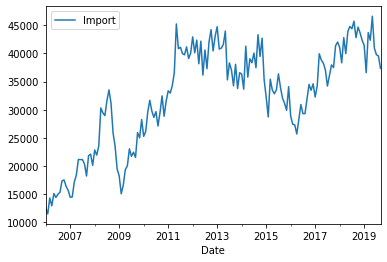

In [162]:
df1.plot('Date','Import')

In [163]:
### Testing and Stationarity
from statsmodels.tsa.stattools import adfuller

In [164]:
test_result=adfuller(df1['Import'])

In [165]:
def adfuller_test(Import):
    result=adfuller(Import)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [166]:
adfuller_test(df1['Import'])

ADF Test Statistic : -2.299030923400675
p-value : 0.17228070849725913
#Lags Used : 1
Number of Observations Used : 163
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [167]:
df1['Import First Difference'] = df1['Import'] - df1['Import'].shift(1)

In [168]:
df1['Import'].shift(1)

0           NaN
1      12519.71
2      11479.69
3      14314.02
4      12924.18
         ...   
160    42361.61
161    46618.80
162    40941.24
163    39773.89
164    39558.33
Name: Import, Length: 165, dtype: float64

In [169]:
df1['Seasonal First Difference']=df1['Import']-df1['Import'].shift(12)

In [170]:
df1.head(20)

,Date,Import,Import First Difference,Seasonal First Difference
0,2006-01-01,12519.71,NaN,NaN
1,2006-02-01,11479.69,-1040.02,NaN
2,2006-03-01,14314.02,2834.33,NaN
3,2006-04-01,12924.18,-1389.84,NaN
4,2006-05-01,15105.67,2181.49,NaN
5,2006-06-01,14399.73,-705.94,NaN
6,2006-07-01,14985.01,585.28,NaN
7,2006-08-01,15326.36,341.35,NaN
8,2006-09-01,17350.69,2024.33,NaN
9,2006-10-01,17512.02,161.33,NaN


In [171]:
## Again test dickey fuller test
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.9426436026248515
p-value : 0.31227362227758326
#Lags Used : 12
Number of Observations Used : 140
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


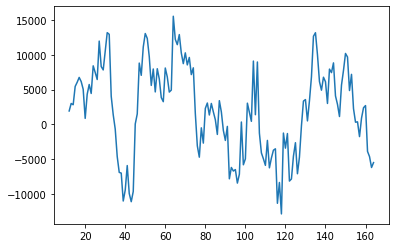

In [172]:
df1['Seasonal First Difference'].plot()

Auto Regressive model

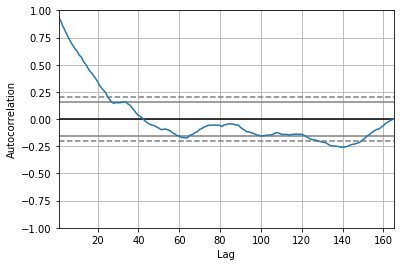

In [173]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Import'])
plt.show()

In [174]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels

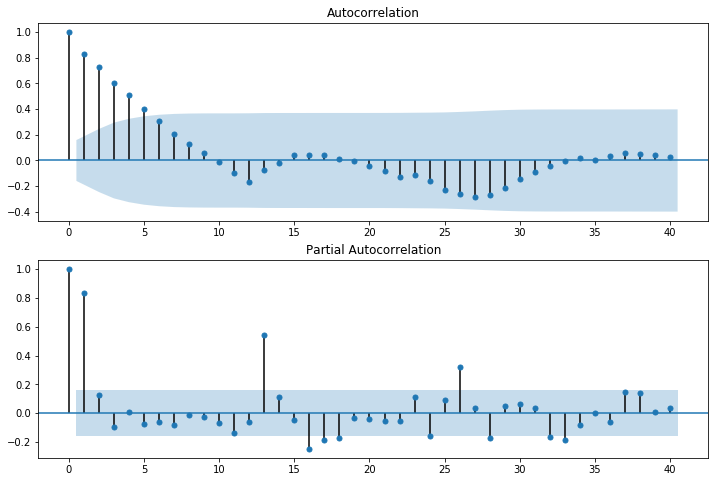

In [175]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [176]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [177]:
model=ARIMA(df['Import'],order=(1,1,1))
model_fit=model.fit()

In [178]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Import   No. Observations:                  164
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1532.266
Method:                       css-mle   S.D. of innovations           2761.953
Date:                Fri, 07 Aug 2020   AIC                           3072.531
Time:                        08:36:32   BIC                           3084.931
Sample:                             1   HQIC                          3077.565
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            157.1301    164.835      0.953      0.340    -165.940     480.201
ar.L1.D.Import    -0.4736      0.183     -2.593      0.010      -0.832      -0.116
ma.L1.D.Import     0.1248      0.206      0.607      0.544      -0.278       0.528
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1114           +0.0000j            2.1114            0.5000
MA.1           -8.0132           +0.0000j            8.0132            0.5000
-----------------------------------------------------------------------------
"""

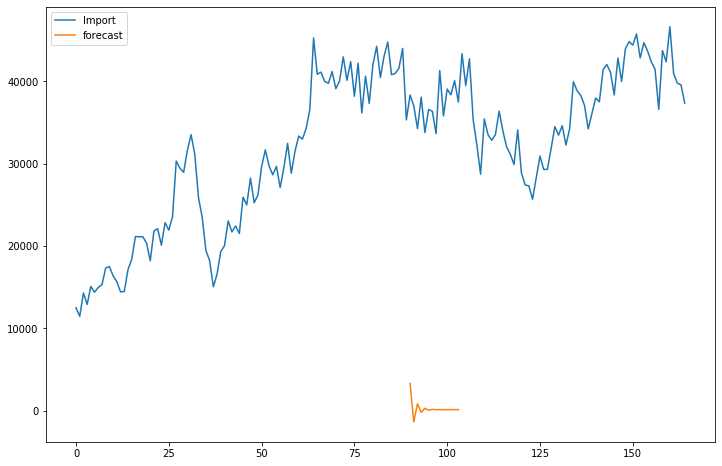

In [179]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Import','forecast']].plot(figsize=(12,8))

In [180]:
import statsmodels.api as sm

In [181]:
model=sm.tsa.statespace.SARIMAX(df1['Import'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

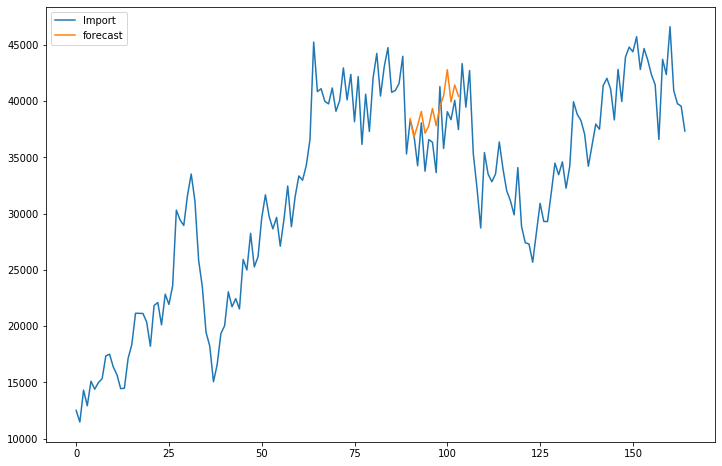

In [182]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['Import','forecast']].plot(figsize=(12,8))

In [183]:
f1=['Date']
df2=df1[f1]
df2['Date']

0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
160   2019-05-01
161   2019-06-01
162   2019-07-01
163   2019-08-01
164   2019-09-01
Name: Date, Length: 165, dtype: datetime64[ns]

For One year

In [184]:
from pandas.tseries.offsets import DateOffset
future_dates1=[df2['Date']+ DateOffset(months=x)for x in range(0,12)]
print(future_date1s[:-1])

[0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
160   2019-05-01
161   2019-06-01
162   2019-07-01
163   2019-08-01
164   2019-09-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-02-01
1     2006-03-01
2     2006-04-01
3     2006-05-01
4     2006-06-01
         ...    
160   2019-06-01
161   2019-07-01
162   2019-08-01
163   2019-09-01
164   2019-10-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-03-01
1     2006-04-01
2     2006-05-01
3     2006-06-01
4     2006-07-01
         ...    
160   2019-07-01
161   2019-08-01
162   2019-09-01
163   2019-10-01
164   2019-11-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-04-01
1     2006-05-01
2     2006-06-01
3     2006-07-01
4     2006-08-01
         ...    
160   2019-08-01
161   2019-09-01
162   2019-10-01
163   2019-11-01
164   2019-12-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-05-01
1     2006-06-01
2     2006-07-01
3     20

In [185]:
f3=['Import','Import First Difference','Seasonal First Difference','forecast']
df3=df1[f3]
df3.head()

,Import,Import First Difference,Seasonal First Difference,forecast
0,12519.71,NaN,NaN,NaN
1,11479.69,-1040.02,NaN,NaN
2,14314.02,2834.33,NaN,NaN
3,12924.18,-1389.84,NaN,NaN
4,15105.67,2181.49,NaN,NaN


In [186]:
future_datest_df=pd.DataFrame(index=future_dates1[0],columns=df3.columns)

In [187]:
future_datest_df.head()

,Import,Import First Difference,Seasonal First Difference,forecast
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-02-01,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN


In [188]:
future_df=pd.concat([df3,future_datest_df])
future_df.tail()

,Import,Import First Difference,Seasonal First Difference,forecast
2019-05-01 00:00:00,NaN,NaN,NaN,NaN
2019-06-01 00:00:00,NaN,NaN,NaN,NaN
2019-07-01 00:00:00,NaN,NaN,NaN,NaN
2019-08-01 00:00:00,NaN,NaN,NaN,NaN
2019-09-01 00:00:00,NaN,NaN,NaN,NaN


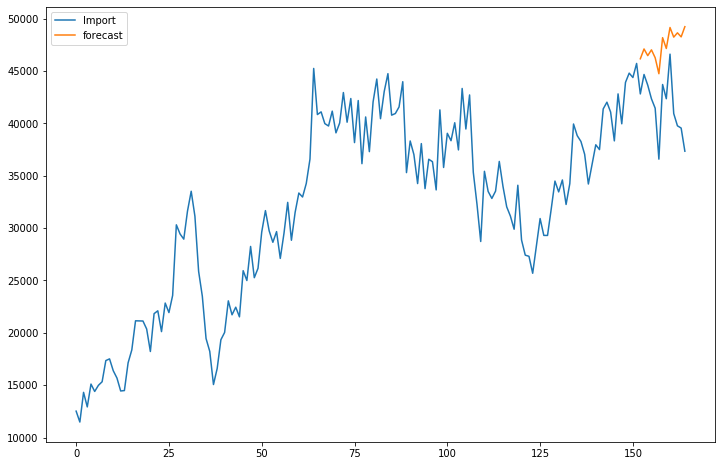

In [189]:
future_df['forecast'] = results.predict(start = 152, end = 168, dynamic= True)  
future_df[['Import', 'forecast']].plot(figsize=(12, 8))

In [190]:
from pandas.tseries.offsets import DateOffset
future_date1s=[df2['Date']+ DateOffset(months=x)for x in range(0,36)]
print(future_dates1[:-1])

[0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
160   2019-05-01
161   2019-06-01
162   2019-07-01
163   2019-08-01
164   2019-09-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-02-01
1     2006-03-01
2     2006-04-01
3     2006-05-01
4     2006-06-01
         ...    
160   2019-06-01
161   2019-07-01
162   2019-08-01
163   2019-09-01
164   2019-10-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-03-01
1     2006-04-01
2     2006-05-01
3     2006-06-01
4     2006-07-01
         ...    
160   2019-07-01
161   2019-08-01
162   2019-09-01
163   2019-10-01
164   2019-11-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-04-01
1     2006-05-01
2     2006-06-01
3     2006-07-01
4     2006-08-01
         ...    
160   2019-08-01
161   2019-09-01
162   2019-10-01
163   2019-11-01
164   2019-12-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-05-01
1     2006-06-01
2     2006-07-01
3     20

In [191]:
f6=['Import','Import First Difference','Seasonal First Difference','forecast']
df6=df1[f6]
df6.head()

,Import,Import First Difference,Seasonal First Difference,forecast
0,12519.71,NaN,NaN,NaN
1,11479.69,-1040.02,NaN,NaN
2,14314.02,2834.33,NaN,NaN
3,12924.18,-1389.84,NaN,NaN
4,15105.67,2181.49,NaN,NaN


In [192]:
future_datest_df1=pd.DataFrame(index=future_dates1[0],columns=df6.columns)

In [193]:
future_df1=pd.concat([df6,future_datest_df1])
future_df1.tail()

,Import,Import First Difference,Seasonal First Difference,forecast
2019-05-01 00:00:00,NaN,NaN,NaN,NaN
2019-06-01 00:00:00,NaN,NaN,NaN,NaN
2019-07-01 00:00:00,NaN,NaN,NaN,NaN
2019-08-01 00:00:00,NaN,NaN,NaN,NaN
2019-09-01 00:00:00,NaN,NaN,NaN,NaN


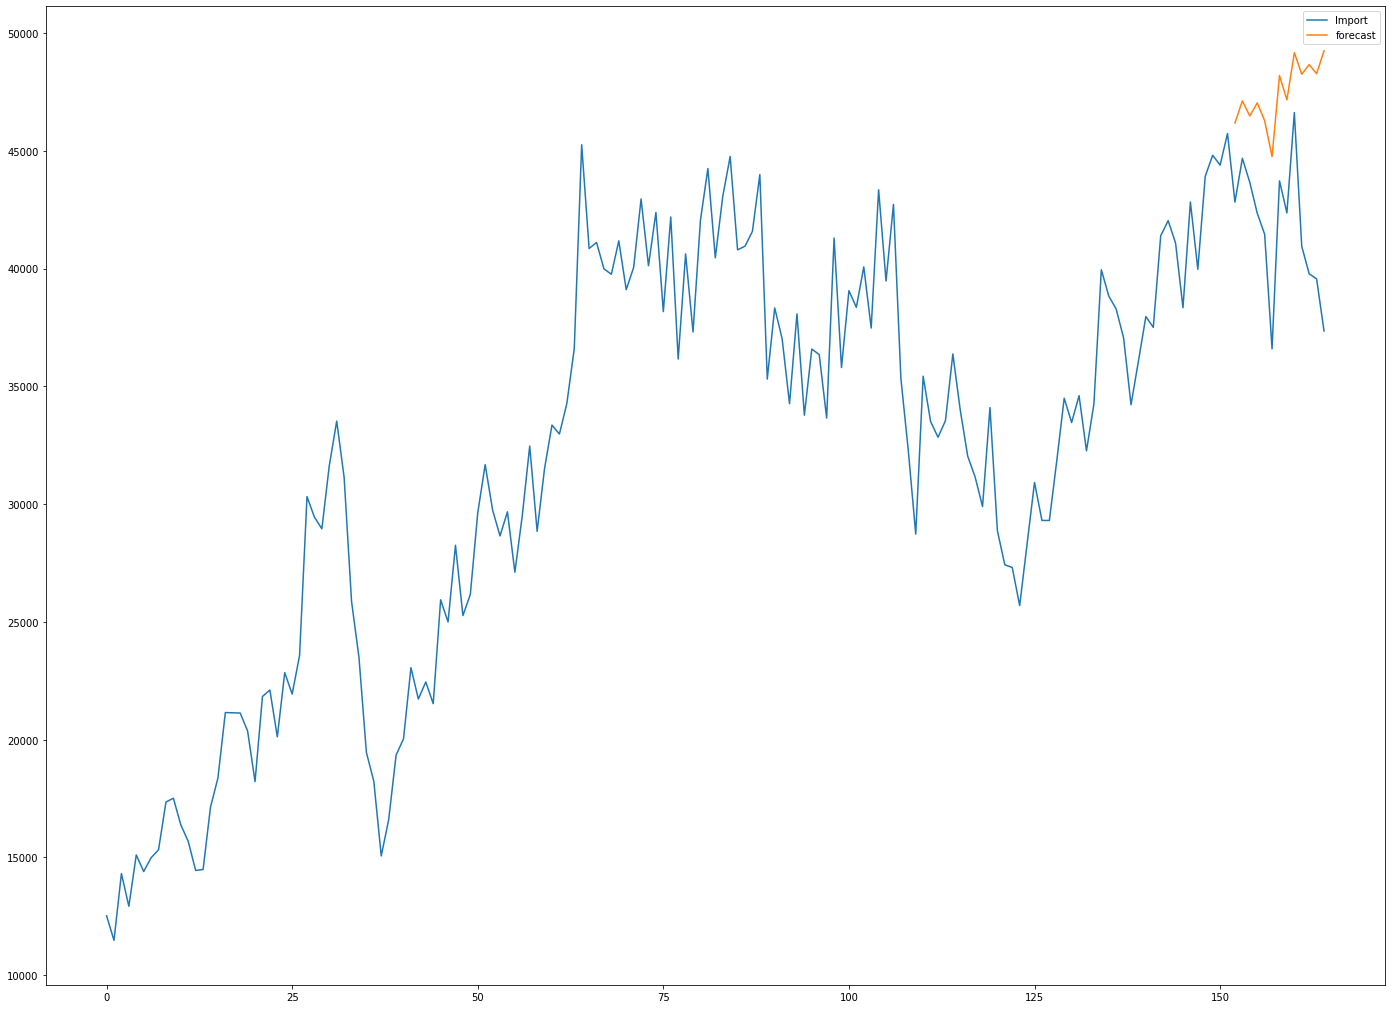

In [201]:
future_df1['forecast'] = results.predict(start = 152, end = 166, dynamic= True)  
future_df1[['Import', 'forecast']].plot(figsize=(24,18))

Export

In [206]:
features=['Date','Export']
df1=df[features]
df1.head()

,Date,Export
0,2006-01-01,9143.66
1,2006-02-01,8993.29
2,2006-03-01,11560.97
3,2006-04-01,8624.66
4,2006-05-01,10109.30


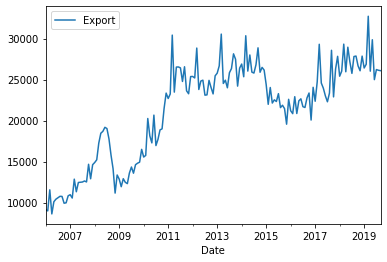

In [208]:
df1.plot('Date','Export')

In [209]:
### Testing and Stationarity
from statsmodels.tsa.stattools import adfuller

In [211]:
test_result=adfuller(df1['Export'])

In [213]:
def adfuller_test(Export):
    result=adfuller(Export)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [214]:
adfuller_test(df1['Export'])

ADF Test Statistic : -1.9961003848278336
p-value : 0.28828555785079035
#Lags Used : 12
Number of Observations Used : 152
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [215]:
df1['Export First Difference'] = df1['Export'] - df1['Export'].shift(1)

In [217]:
df1['Export'].shift(1)

0           NaN
1       9143.66
2       8993.29
3      11560.97
4       8624.66
         ...   
160    26023.18
161    29854.24
162    24990.77
163    26217.50
164    26133.50
Name: Export, Length: 165, dtype: float64

In [218]:
df1['Seasonal First Difference']=df1['Export']-df1['Export'].shift(12)

In [219]:
df1.head(20)

,Date,Export,Export First Difference,Seasonal First Difference
0,2006-01-01,9143.66,NaN,NaN
1,2006-02-01,8993.29,-150.37,NaN
2,2006-03-01,11560.97,2567.68,NaN
3,2006-04-01,8624.66,-2936.31,NaN
4,2006-05-01,10109.30,1484.64,NaN
5,2006-06-01,10419.60,310.30,NaN
6,2006-07-01,10599.73,180.13,NaN
7,2006-08-01,10769.09,169.36,NaN
8,2006-09-01,10756.49,-12.60,NaN
9,2006-10-01,9928.18,-828.31,NaN


In [221]:
## Again test dickey fuller test
adfuller_test(df1['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.6136095023077592
p-value : 0.09021695655518669
#Lags Used : 12
Number of Observations Used : 140
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


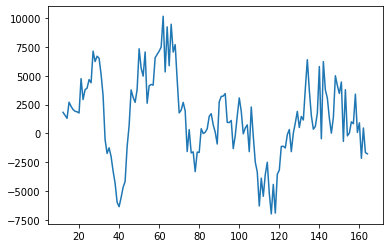

In [223]:
df1['Seasonal First Difference'].plot()

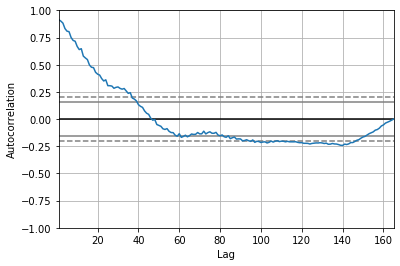

In [224]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1['Export'])
plt.show()

In [225]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels

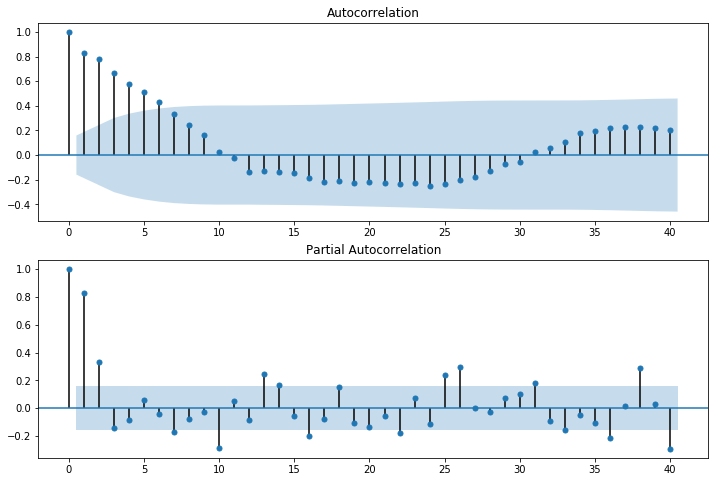

In [226]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(df1['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [227]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [229]:
model=ARIMA(df['Export'],order=(1,1,1))
model_fit=model.fit()

In [230]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Export   No. Observations:                  164
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1470.362
Method:                       css-mle   S.D. of innovations           1892.197
Date:                Fri, 07 Aug 2020   AIC                           2948.724
Time:                        09:49:39   BIC                           2961.124
Sample:                             1   HQIC                          2953.758
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            103.3071     76.897      1.343      0.179     -47.408     254.022
ar.L1.D.Export    -0.2943      0.122     -2.409      0.016      -0.534      -0.055
ma.L1.D.Export    -0.3294      0.117     -2.817      0.005      -0.559      -0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3980           +0.0000j            3.3980            0.5000
MA.1            3.0361           +0.0000j            3.0361            0.0000
-----------------------------------------------------------------------------
"""

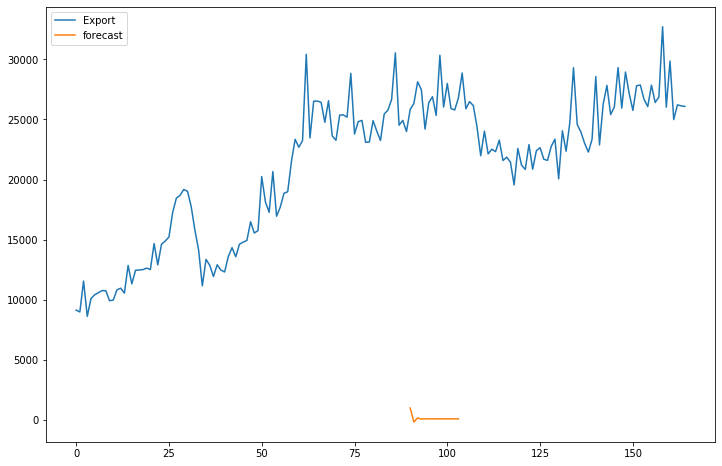

In [231]:
df1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df1[['Export','forecast']].plot(figsize=(12,8))

In [232]:
import statsmodels.api as sm

In [234]:
model=sm.tsa.statespace.SARIMAX(df1['Export'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

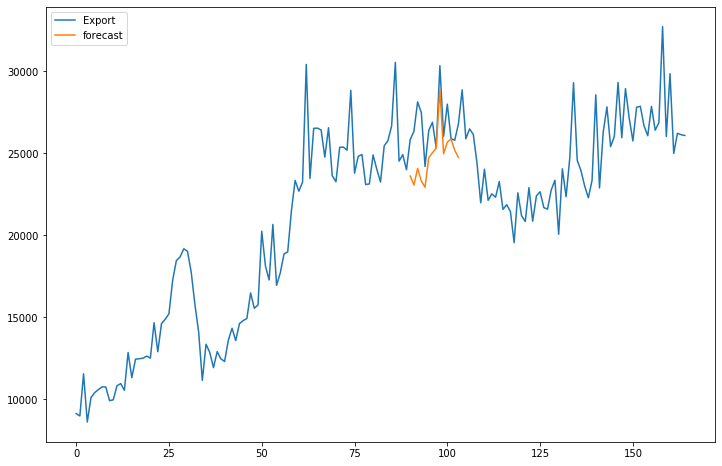

In [235]:
df1['forecast']=results.predict(start=90,end=103,dynamic=True)
df1[['Export','forecast']].plot(figsize=(12,8))

In [236]:
f1=['Date']
df2=df1[f1]
df2['Date']

0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
160   2019-05-01
161   2019-06-01
162   2019-07-01
163   2019-08-01
164   2019-09-01
Name: Date, Length: 165, dtype: datetime64[ns]

In [237]:
from pandas.tseries.offsets import DateOffset
future_dates1=[df2['Date']+ DateOffset(months=x)for x in range(0,12)]
print(future_date1s[:-1])

[0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
160   2019-05-01
161   2019-06-01
162   2019-07-01
163   2019-08-01
164   2019-09-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-02-01
1     2006-03-01
2     2006-04-01
3     2006-05-01
4     2006-06-01
         ...    
160   2019-06-01
161   2019-07-01
162   2019-08-01
163   2019-09-01
164   2019-10-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-03-01
1     2006-04-01
2     2006-05-01
3     2006-06-01
4     2006-07-01
         ...    
160   2019-07-01
161   2019-08-01
162   2019-09-01
163   2019-10-01
164   2019-11-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-04-01
1     2006-05-01
2     2006-06-01
3     2006-07-01
4     2006-08-01
         ...    
160   2019-08-01
161   2019-09-01
162   2019-10-01
163   2019-11-01
164   2019-12-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-05-01
1     2006-06-01
2     2006-07-01
3     20

In [239]:
f3=['Export','Export First Difference','Seasonal First Difference','forecast']
df3=df1[f3]
df3.head()

,Export,Export First Difference,Seasonal First Difference,forecast
0,9143.66,NaN,NaN,NaN
1,8993.29,-150.37,NaN,NaN
2,11560.97,2567.68,NaN,NaN
3,8624.66,-2936.31,NaN,NaN
4,10109.30,1484.64,NaN,NaN


In [240]:
future_datest_df=pd.DataFrame(index=future_dates1[0],columns=df3.columns)

In [241]:
future_datest_df.head()

,Export,Export First Difference,Seasonal First Difference,forecast
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-02-01,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN


In [242]:
future_df=pd.concat([df3,future_datest_df])
future_df.tail()

,Export,Export First Difference,Seasonal First Difference,forecast
2019-05-01 00:00:00,NaN,NaN,NaN,NaN
2019-06-01 00:00:00,NaN,NaN,NaN,NaN
2019-07-01 00:00:00,NaN,NaN,NaN,NaN
2019-08-01 00:00:00,NaN,NaN,NaN,NaN
2019-09-01 00:00:00,NaN,NaN,NaN,NaN


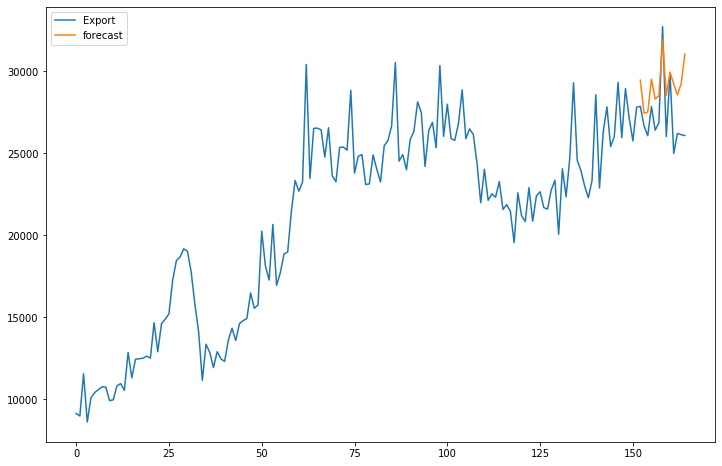

In [243]:
future_df['forecast'] = results.predict(start = 152, end = 168, dynamic= True)  
future_df[['Export', 'forecast']].plot(figsize=(12, 8))

In [244]:
from pandas.tseries.offsets import DateOffset
future_date1s=[df2['Date']+ DateOffset(months=x)for x in range(0,36)]
print(future_dates1[:-1])

[0     2006-01-01
1     2006-02-01
2     2006-03-01
3     2006-04-01
4     2006-05-01
         ...    
160   2019-05-01
161   2019-06-01
162   2019-07-01
163   2019-08-01
164   2019-09-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-02-01
1     2006-03-01
2     2006-04-01
3     2006-05-01
4     2006-06-01
         ...    
160   2019-06-01
161   2019-07-01
162   2019-08-01
163   2019-09-01
164   2019-10-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-03-01
1     2006-04-01
2     2006-05-01
3     2006-06-01
4     2006-07-01
         ...    
160   2019-07-01
161   2019-08-01
162   2019-09-01
163   2019-10-01
164   2019-11-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-04-01
1     2006-05-01
2     2006-06-01
3     2006-07-01
4     2006-08-01
         ...    
160   2019-08-01
161   2019-09-01
162   2019-10-01
163   2019-11-01
164   2019-12-01
Name: Date, Length: 165, dtype: datetime64[ns], 0     2006-05-01
1     2006-06-01
2     2006-07-01
3     20

In [246]:
f6=['Export','Export First Difference','Seasonal First Difference','forecast']
df6=df1[f6]
df6.head()

,Export,Export First Difference,Seasonal First Difference,forecast
0,9143.66,NaN,NaN,NaN
1,8993.29,-150.37,NaN,NaN
2,11560.97,2567.68,NaN,NaN
3,8624.66,-2936.31,NaN,NaN
4,10109.30,1484.64,NaN,NaN


In [247]:
future_datest_df1=pd.DataFrame(index=future_dates1[0],columns=df6.columns)

In [248]:
future_df1=pd.concat([df6,future_datest_df1])
future_df1.tail()

,Export,Export First Difference,Seasonal First Difference,forecast
2019-05-01 00:00:00,NaN,NaN,NaN,NaN
2019-06-01 00:00:00,NaN,NaN,NaN,NaN
2019-07-01 00:00:00,NaN,NaN,NaN,NaN
2019-08-01 00:00:00,NaN,NaN,NaN,NaN
2019-09-01 00:00:00,NaN,NaN,NaN,NaN


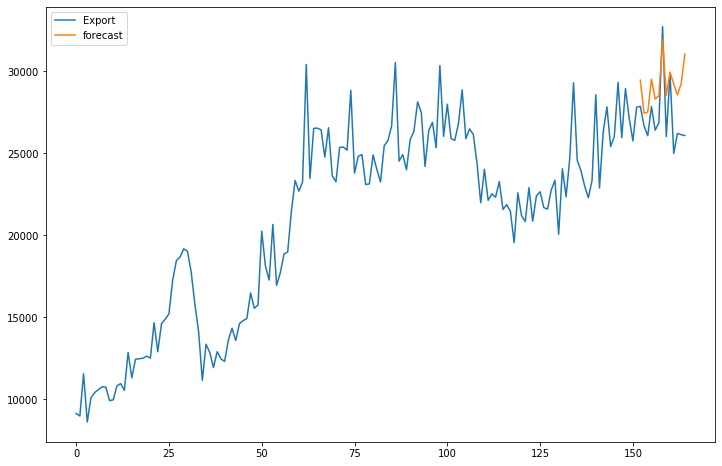

In [251]:
future_df1['forecast'] = results.predict(start = 152, end = 166, dynamic= True)  
future_df1[['Export', 'forecast']].plot(figsize=(12,8))

Here,the dataset contains import and export parameters and also date and the data is seasonal and by this date i need to forecaste annual as well as present to three year data so i divide the dataset in two part one for the import and another for export and use arima model to forecast the import and export and it gave me to good accuracy and i use dataoffset for future prediction.